In [1]:
from time import perf_counter as time

import numpy as np
import matplotlib.pyplot as plt

from lib.algos.best_split import find_best_split, METHODS

In [2]:
# sanity check + compile numba:
n = 100

x = np.random.rand(n)
y = np.random.rand(n)
w = np.random.rand(n)
{
    find_best_split(x, y, w, alpha=0.5, method=name)[0]
    for name in METHODS
}

{np.float64(0.8159407929766649)}

In [3]:
def plot_execution_time_comparison(sample_data, max_log_n=5.5):
    ns = np.logspace(max_log_n - 1.5, max_log_n, num=30).astype(int)
    dts = {name: [] for name in METHODS}
    for n in ns:
        n_repeats = round(3 * ns.max() / n)
        sampled_data = [sample_data(n) for _ in range(n_repeats)]
        for name in METHODS:
            dt = 0
            for x, y, w in sampled_data:
                t = time()
                _ = find_best_split(x, y, w, method=name)
                dt += time() - t
            dts[name].append(dt / n_repeats)

    # plot results for each method
    for name in METHODS:
        plt.plot(ns, dts[name])
    plt.legend(list(METHODS))
    plt.xlabel('n')
    plt.ylabel('execution time')
    plt.title(sample_data.__name__)
    # plt.loglog()
    plt.show()

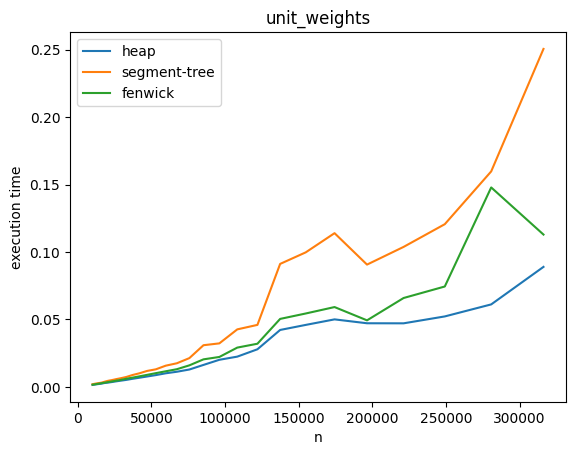

In [4]:
def unit_weights(n):
    return np.random.rand(n), np.random.rand(n), np.ones(n)

plot_execution_time_comparison(unit_weights)

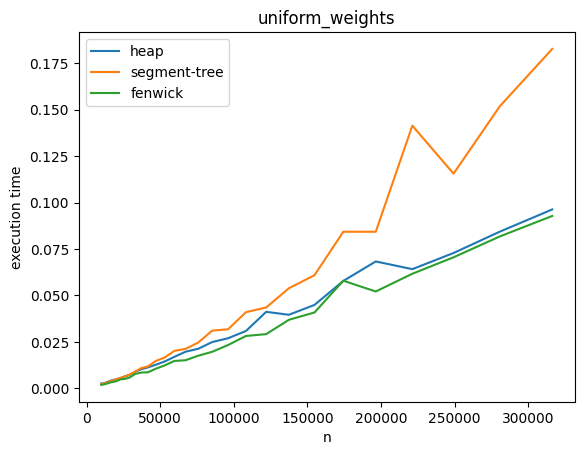

In [5]:
def uniform_weights(n):
    return np.random.rand(n), np.random.rand(n), np.random.rand(n)

plot_execution_time_comparison(uniform_weights)

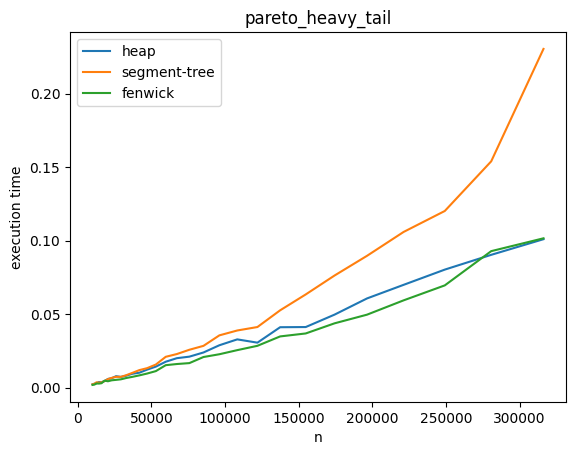

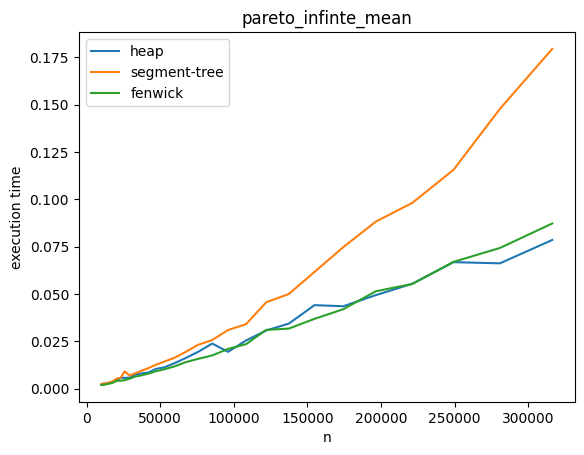

In [6]:
def pareto_heavy_tail(n):
    return np.random.rand(n), np.random.rand(n), np.random.pareto(1.01, size=n)

def pareto_infinte_mean(n):
    return np.random.rand(n), np.random.rand(n), np.random.pareto(0.5, size=n)


plot_execution_time_comparison(pareto_heavy_tail)
plot_execution_time_comparison(pareto_infinte_mean)

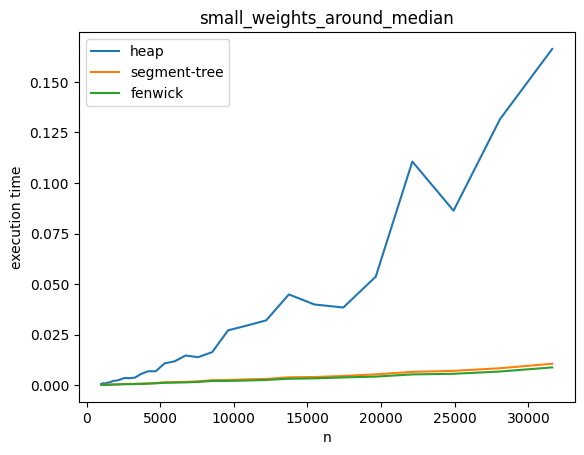

In [7]:
def small_weights_around_median(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    w = np.ones(n)
    w[(0.25 < y) & (y < 0.75)] = 0.01
    return x, y, w

plot_execution_time_comparison(small_weights_around_median, max_log_n=4.5)

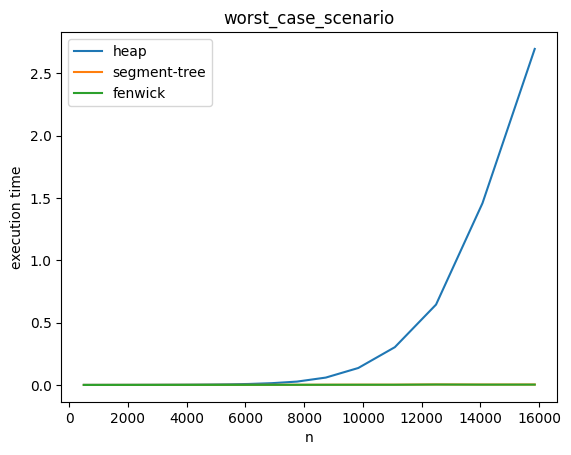

In [10]:
def worst_case_scenario(n):
    r = np.arange(n)
    y = np.power(-1.0008, r)
    w = np.power(1.0008, r)
    return r.astype('float64'), y, w

plot_execution_time_comparison(worst_case_scenario, max_log_n=4.2)